In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import math
from matplotlib.pyplot import figure
import matplotlib.font_manager as fm
#import max_property
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
from scipy.optimize import curve_fit
import ast
from scipy.spatial import distance
import matplotlib
import ast

/home/balla/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/balla/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar'

# Upload data

#### raw data

In [2]:
pone = pd.read_csv('../../Data/Experiment/Plosone/pone_final.csv',index_col='Unnamed: 0')
pone

,Year,Title,Abstract,Role,Affiliation index,Affiliation list,Discipline,Filename
0,2016,"1,25(OH)2D3 and VDR Signaling Pathways Regulat...",\n\nBackground\nThe objective of this study is...,"[[], [], [], [], [], [], [], []]","[['aff001'], ['aff001', 'cor001'], ['aff001'],...","['1 Department of Ophthalmology, The Affiliate...","['Medicine and health sciences', 'Anatomy', 'B...",/data02/plos/pone/journal.pone.0164717.xml
1,2018,"A non-invasive, quantitative study of broadban...","\nCurrently, non-invasive methods for studying...","[['Data curation', 'Formal analysis', 'Investi...","[['aff001', 'cor001'], ['aff001'], ['aff002'],...",['1 Department of Psychology and Center for Ne...,"['Engineering and technology', 'Signal process...",/data02/plos/pone/journal.pone.0193107.xml
2,2016,The Effects of Financial Education on Impulsiv...,"\nDelay discounting, as a behavioral measure o...","[[], [], [], []]","[['aff001', 'cor001'], ['aff001'], ['aff002'],...","['1 Department of Psychology, Utah State Unive...","['Social sciences', 'Psychology', 'Personality...",/data02/plos/pone/journal.pone.0159561.xml
3,2016,Root-Zone Warming Differently Benefits Mature ...,\nSub-optimal temperature extensively suppress...,"[[], [], [], []]","[['aff001'], ['aff001'], ['aff001'], ['cor001'...",['Beijing Key Laboratory of Growth and Develop...,"['Medicine and health sciences', 'Vascular med...",/data02/plos/pone/journal.pone.0155298.xml
4,2017,A hypomorphic PIGA gene mutation causes severe...,\nMutations in genes involved in glycosylphosp...,"[[], [], [], [], [], [], [], [], [], [], []]","[['aff001'], ['aff002'], ['aff001'], ['aff001'...","['1 Division of Hematology, Department of Medi...","['Biology and life sciences', 'Cell biology', ...",/data02/plos/pone/journal.pone.0174074.xml
...,...,...,...,...,...,...,...,...
70382,2018,Measurement agreement of the self-administered...,\nBefore organizing mixed-mode data collection...,"[['Formal analysis', 'Investigation', 'Methodo...","[['aff001', 'aff002', 'cor001'], ['aff001'], [...","['1 Department Epidemiology and public health,...","['Medicine and health sciences', 'Mental healt...",/data02/plos/pone/journal.pone.0197434.xml
70383,2019,ST analysis of the fetal electrocardiogram – C...,"\nIn their paper, Andriessen at al present a v...","[['Conceptualization', 'Formal analysis', 'Wri...","[['aff001'], ['aff002'], ['aff003', 'currentaf...","['1 Department of Pediatrics, Institute of Cli...","['Medicine and health sciences', 'Cardiology',...",/data02/plos/pone/journal.pone.0221210.xml
70384,2018,Commentary on “The number of undocumented immi...,\n“The number of undocumented immigrants in th...,"[['Writing – original draft'], ['Methodology',...","[['aff001'], ['aff001'], ['aff002'], ['aff001'...","['1 Migration Policy Institute, Washington, D....","['Social sciences', 'Human geography', 'Housing']",/data02/plos/pone/journal.pone.0204199.xml
70385,2019,Why -aVF can be used in STAN as a proxy for sc...,\nThe conclusion of our recent paper that perf...,"[['Conceptualization', 'Data curation', 'Forma...","[['aff001', 'aff002', 'cor001'], ['aff003', 'a...","['1 Department of Biomedical Engineering, Maas...","['Medicine and health sciences', 'Medical devi...",/data02/plos/pone/journal.pone.0221220.xml


In [68]:
total_vector = np.load('../../Data/Experiment/Plosone/pone_sBERT.npy')

In [4]:
pone['Affiliation index'] = pone['Affiliation index'] .apply(lambda x: ast.literal_eval(x))
pone['Affiliation list'] = pone['Affiliation list'].apply(lambda x: ast.literal_eval(x))
pone['Discipline'] = pone['Discipline'] .apply(lambda x: ast.literal_eval(x))

In [5]:
pone['Vector'] = list(total_vector)

In [79]:
pone['Affiliation index cleaned'][59775]

[['001'], ['002'], ['003'], ['003'], ['002'], ['002']]

In [82]:
pone['Affiliation index cleaned'][33832]

[['001'], ['002', '001'], ['003', '001']]

In [67]:
pone['Title'][11148]

'No Positive Association between Vitamin D Level and Immune Responses to Hepatitis B and Streptococcus pneumoniae Vaccination in HIV-Infected Adults'

In [64]:
pone['Affiliation index cleaned'][697]

[['001'], ['001'], ['001'], ['001', '002']]

## Calculate mean vector

In [7]:
sub_name = ['Earth sciences',
 'Ecology and environmental sciences',
 'Computer and information sciences',
 'Engineering and technology',
 'Physical sciences',
 'Science policy',
 'Medicine and health sciences',
 'Research and analysis methods',
'Biology and life sciences',
 'People and places',
'Social sciences']


In [8]:
# index number of each research institute
index_by_subject = {}
for subject in sub_name:
    print(subject)
    index_by_subject[subject] = list(pone[pone['Discipline'].apply(lambda x: True if subject in x else False)].index)


Earth sciences
Ecology and environmental sciences
Computer and information sciences
Engineering and technology
Physical sciences
Science policy
Medicine and health sciences
Research and analysis methods
Biology and life sciences
People and places
Social sciences


In [9]:
mean_vec = {}
for i, name in enumerate(sub_name):
    print(name)
    vecs = np.array(total_vector[index_by_subject[name]])
    mean_cordinate = np.mean(vecs,axis=0)
    mean_vec[name]= mean_cordinate

Earth sciences
Ecology and environmental sciences
Computer and information sciences
Engineering and technology
Physical sciences
Science policy
Medicine and health sciences
Research and analysis methods
Biology and life sciences
People and places
Social sciences


In [72]:
pone['Main Discipline'] = pone['Discipline'].apply(lambda x: x[0])

In [73]:
pone['Main Discipline']

0        Medicine and health sciences
1          Engineering and technology
2                     Social sciences
3        Medicine and health sciences
4           Biology and life sciences
                     ...             
70382    Medicine and health sciences
70383    Medicine and health sciences
70384                 Social sciences
70385    Medicine and health sciences
70386       Biology and life sciences
Name: Main Discipline, Length: 70387, dtype: object

In [74]:
mean_vec_year = {}
for i, name in enumerate(sub_name):
    print(name)
    mean_list = []
    for year in [2016,2017,2018,2019]:
        pone[(pone['Year'] == year)&(pone['Main Discipline']==name)]
        vecs = np.array(total_vector[index_by_subject[name]])
        mean_cordinate = np.mean(vecs,axis=0)
        mean_list.append(mean_cordinate)
    mean_vec_year[name]= mean_list

Earth sciences
Ecology and environmental sciences
Computer and information sciences
Engineering and technology
Physical sciences
Science policy
Medicine and health sciences
Research and analysis methods
Biology and life sciences
People and places
Social sciences


#### Calculate mean vector per year

In [10]:
# mean_vec_year={}
# for i, name in enumerate(set(report_2018['Institute'])):
#     print(name)
#     if (name == 'KDI국제정책대학원') or (name == '경제인문사회연구회'):
#         continue
#     else:
#         mean_year_list = []
#         for year in range(2000,2019):
#             if len(report_2018[(report_2018['Institute']==name)&(report_2018['Year']==year)])==0:
#                 mean_year_list.append(np.nan)
#             else:
#                 vecs = np.array(report_2018[(report_2018['Institute']==name)&(report_2018['Year']==year)]['Vector'])
#                 mean_cordinate = np.mean(vecs,axis=0)
#                 mean_year_list.append(mean_cordinate)
#         mean_vec_year[name] = mean_year_list

# Affiliation cleaning

In [51]:
def aff_cleaning(aff_list):
    new_aff_list = []
    for auth in aff_list:
        total_aff=[]
        for aff in auth:
            if 'aff' in aff:
                total_aff.append(aff.split('aff')[1])
            elif 'cor' in aff:
                total_aff.append(aff.split('cor')[1])
            elif 'contrib' in aff:
                total_aff.append(aff.split('contrib')[1])
            elif 'fn' not in aff:
                print(aff)
        new_aff_list.append(list(set(total_aff)))
    
    return new_aff_list
    

In [52]:
pone['Affiliation index cleaned'] = pone['Affiliation index'].apply(lambda x: aff_cleaning(x))

# Calculate Author diversity (GINI IMPURITY)

$G = \sum_{i=1}^{C} p(i)*(1-p(i)) $

In [54]:
def get_gini_diversity(cleaned_aff_list):
    total_aff_list = [x for sublist in cleaned_aff_list for x in sublist]
    auth_numb = len(cleaned_aff_list)
    total_aff_list = set(total_aff_list)
    G = 0
    for aff in total_aff_list:
        p = 0
        for auth in cleaned_aff_list:
            if aff in auth:
                p += 1/auth_numb
        G += p * (1-p)
    
    return G

In [55]:
pone['Gini Diversity'] = pone['Affiliation index cleaned'].apply(lambda x: get_gini_diversity(x))

In [56]:
pone

,Year,Title,Abstract,Role,Affiliation index,Affiliation list,Discipline,Filename,Vector,auth diversity,Total author number,Cos_dis,Affiliation index cleaned,Gini Diversity
0,2016,"1,25(OH)2D3 and VDR Signaling Pathways Regulat...",\n\nBackground\nThe objective of this study is...,"[[], [], [], [], [], [], [], []]","[[aff001], [aff001, cor001], [aff001], [aff001...","[1 Department of Ophthalmology, The Affiliated...","[Medicine and health sciences, Anatomy, Biolog...",/data02/plos/pone/journal.pone.0164717.xml,"[-0.32410893, 0.8232349, 0.2080707, 0.32124147...",0.250000,8,0.271222,"[[001], [001], [001], [001], [002], [001], [00...",0.218750
1,2018,"A non-invasive, quantitative study of broadban...","\nCurrently, non-invasive methods for studying...","[['Data curation', 'Formal analysis', 'Investi...","[[aff001, cor001], [aff001], [aff002], [aff003...",[1 Department of Psychology and Center for Neu...,"[Engineering and technology, Signal processing...",/data02/plos/pone/journal.pone.0193107.xml,"[-0.5660498, 0.45981848, 0.6062409, -0.6342567...",0.500000,6,0.200227,"[[001], [001], [002], [003], [001], [001]]",0.500000
2,2016,The Effects of Financial Education on Impulsiv...,"\nDelay discounting, as a behavioral measure o...","[[], [], [], []]","[[aff001, cor001], [aff001], [aff002], [aff001]]","[1 Department of Psychology, Utah State Univer...","[Social sciences, Psychology, Personality, Per...",/data02/plos/pone/journal.pone.0159561.xml,"[-0.29218358, 0.43825418, 0.04129696, -0.00408...",0.500000,4,0.220787,"[[001], [001], [002], [001]]",0.375000
3,2016,Root-Zone Warming Differently Benefits Mature ...,\nSub-optimal temperature extensively suppress...,"[[], [], [], []]","[[aff001], [aff001], [aff001], [cor001, aff001]]",[Beijing Key Laboratory of Growth and Developm...,"[Medicine and health sciences, Vascular medici...",/data02/plos/pone/journal.pone.0155298.xml,"[-0.74166596, 0.041374825, 0.50491214, -0.4551...",0.250000,4,0.418646,"[[001], [001], [001], [001]]",0.000000
4,2017,A hypomorphic PIGA gene mutation causes severe...,\nMutations in genes involved in glycosylphosp...,"[[], [], [], [], [], [], [], [], [], [], []]","[[aff001], [aff002], [aff001], [aff001], [aff0...","[1 Division of Hematology, Department of Medic...","[Biology and life sciences, Cell biology, Cell...",/data02/plos/pone/journal.pone.0174074.xml,"[-0.17636006, 1.1700872, 0.8694962, -0.6944093...",0.363636,11,0.225118,"[[001], [002], [001], [001], [003, 001], [003]...",0.661157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70382,2018,Measurement agreement of the self-administered...,\nBefore organizing mixed-mode data collection...,"[['Formal analysis', 'Investigation', 'Methodo...","[[aff001, aff002, cor001], [aff001], [aff001],...","[1 Department Epidemiology and public health, ...","[Medicine and health sciences, Mental health a...",/data02/plos/pone/journal.pone.0197434.xml,"[-1.4202052, 0.569968, -0.14969283, -0.2491437...",0.400000,10,0.236743,"[[002, 001], [001], [001], [001], [001], [001]...",0.500000
70383,2019,ST analysis of the fetal electrocardiogram – C...,"\nIn their paper, Andriessen at al present a v...","[['Conceptualization', 'Formal analysis', 'Wri...","[[aff001], [aff002], [aff003, currentaff001, c...","[1 Department of Pediatrics, Institute of Clin...","[Medicine and health sciences, Cardiology, Hea...",/data02/plos/pone/journal.pone.0221210.xml,"[-0.99045175, -0.3320594, -0.17605464, -0.7141...",1.000000,3,0.285657,"[[001], [002], [003, 001]]",0.666667
70384,2018,Commentary on “The number of undocumented immi...,\n“The number of undocumented immigrants in th...,"[['Writing – original draft'], ['Methodology',...","[[aff001], [aff001], [aff002], [aff001, cor001]]","[1 Migration Policy Institute, Washington, D.C...","[Social sciences, Human geography, Housing]",/data02/plos/pone/journal.pone.0204199.xml,"[-0.6477006, 0.07978694, -0.077151865, -0.1232...",0.500000,4,0.230878,"[[001], [001], [002], [001]]",0.375000
70385,2019

# Calculate Author diversity (# of aff/ # of author)

In [12]:
pone[pone['Affiliation index'].apply(lambda x: True if 'fn001' in [i for sub in x for i in sub] else False)]

,Year,Title,Abstract,Role,Affiliation index,Affiliation list,Discipline,Filename,Vector
111,2018,An efficient algorithm for estimating brain co...,\nOften derived from partial correlations or m...,"[['Conceptualization', 'Formal analysis', 'Inv...","[[aff001, aff002, currentaff001, cor001], [aff...","[\n1\nSchool of Mathematical Sciences, Queensl...","[Medicine and health sciences, Radiology and i...",/data02/plos/pone/journal.pone.0198583.xml,"[-0.06061507, 0.61907417, -0.11834, -0.4174435..."
159,2018,Access to health insurance coverage among sub-...,\n\nBackground\nMigrants’ access to care depen...,"[['Formal analysis', 'Methodology', 'Validatio...","[[aff001, aff002, cor001], [aff003], [aff003],...","[1 INSERM, Sorbonne Université, Institut Pierr...","[Medicine and health sciences, Women's health]",/data02/plos/pone/journal.pone.0192916.xml,"[-0.07947282, -0.25214607, -0.44541496, 0.3320..."
161,2018,The human experience of social transformation:...,\nArchaeologists and other scholars have long ...,"[['Conceptualization', 'Data curation', 'Inves...","[[aff001, cor001], [aff001, aff002], [fn001]]",[1 School of Human Evolution and Social Change...,"[People and places, Geographical locations, Eu...",/data02/plos/pone/journal.pone.0208060.xml,"[-0.1260235, -0.075600155, 0.22780268, -0.5456..."
303,2016,Obesity and Cardiovascular Risk: Variations in...,\n\nObjectives\nOur aim was to investigate if ...,"[[], [], [], [], [], [], []]","[[aff001, aff002], [aff001, aff002], [aff001, ...",[1 Spanish Biomedical Research Centre in Diabe...,"[Biology and life sciences, Genetics, Heredity...",/data02/plos/pone/journal.pone.0153976.xml,"[-1.2321205, 1.029337, -0.407003, -0.82113093,..."
352,2017,Low versus high dose erythropoiesis-stimulatin...,\nThe increased risks of death and adverse eve...,"[[], [], [], [], [], [], [], [], [], [], [], [...","[[aff001, aff002], [aff003], [aff001], [aff002...","[1 Sydney School of Public Health, Edward Ford...","[Medicine and health sciences, Cardiology, Myo...",/data02/plos/pone/journal.pone.0172735.xml,"[-0.0033828241, -0.5861565, 0.84624594, -0.561..."
...,...,...,...,...,...,...,...,...,...
70094,2017,Association of maternal weight with FADS and E...,\nSingle nucleotide polymorphisms (SNPs) in th...,"[[], [], [], [], [], [], [], [], [], [], [], [...","[[aff001], [aff002, aff003], [aff004], [aff005...","[1 Department of Nutrition, Food Sciences and ...","[Biology and life sciences, Genetics, Heredity...",/data02/plos/pone/journal.pone.0179135.xml,"[-1.5384328, -0.0013708513, 0.028151678, -0.75..."
70226,2016,Association between Maternal Smoking during Pr...,\n\nBackground\nMaternal smoking during pregna...,"[[], [], [], [], [], []]","[[aff001, aff002], [aff002], [aff003], [aff004...",[1 Department of Social Medicine and Health Ed...,"[Medicine and health sciences, Public and occu...",/data02/plos/pone/journal.pone.0146241.xml,"[-1.7593654, 0.5309505, -0.6220512, -0.2115791..."
70293,2019,"HIV prevalence, spatial distribution and risk ...",\n\nIntroduction\nGlobal efforts to end HIV by...,"[['Conceptualization', 'Formal analysis', 'Sup...","[[aff001, cor001], [aff001], [aff002], [aff003...","[1 Kenya Medical Research Institute, Nairobi, ...","[Medicine and health sciences, Public and occu...",/data02/plos/pone/journal.pone.0214360.xml,"[0.7039757, -0.309783, 0.4846446, 0.5859359, 0..."
70302,2016,Targeted Next Generation Sequencing in Patient...,\n\nBackground\nNext-generation sequencing (NG...,"[[], [], [], [], [], [], [], [], [], [], []]","[[aff001], [aff002, aff003], [aff001, aff006],...",[1 Department of Clinical Biochemistry and Ins...,"[Medicine and health sciences, Anatomy, Nervou...",/data02/plos/pone/journal.pone.0156359.xml,"[-0.37304604, 0.9783403, -0.9185272, -1.379437..."


In [13]:
pone['Affiliation index'][159],pone['Affiliation list'][159]

([['aff001', 'aff002', 'cor001'],
  ['aff003'],
  ['aff003'],
  ['aff003'],
  ['aff003'],
  ['aff004'],
  ['aff005'],
  ['aff006'],
  ['aff001'],
  ['fn001']],
 ['1 INSERM, Sorbonne Université, Institut Pierre Louis d’Épidémiologie et de Santé Publique (IPLESP), Department of Social Epidemiology, Paris, France',
  '2 Groupe hospitalier Sud Ile-de-France, Department of Infectious and Tropical Diseases, Melun, France',
  '3 Sorbonne Paris Cités, IRD, CEPED, ERL INSERM 1244 SAGESUD, Paris, France',
  '4 INSERM, Centre for Research in Epidemiology and Population Health (CESP-U 1018), Villejuif, France',
  '5 Santé Publique France, French National Agency of Public Health, Saint-Maurice, France',
  '6 Paris 13 University, Avicenne Hospital, Assistance Publique-Hôpitaux de Paris (AP-HP), Department of Infectious and Tropical diseases, and Laboratoire Educations et Pratiques de Santé (LEPS EA 3412), Bobigny, France'])

In [57]:
def get_diversity(gini_list):
    total_aff_list = [x for sublist in gini_list for x in sublist]
    total_aff=[]
    for x in total_aff_list:
        if 'aff' in x:
            total_aff.append(x.split('aff')[1])
        elif 'cor' in x:
            total_aff.append(x.split('cor')[1])
        elif 'contrib' in x:
            total_aff.append(x.split('contrib')[1])
        elif 'fn' not in x:
            print(x)
    total_aff = set(total_aff)
    total_auth = len(gini_list)
    return len(total_aff)/total_auth

In [58]:
pone['auth diversity'] = pone['Affiliation index'].apply(lambda x: get_diversity(x))

In [18]:
pone['Total author number'] = pone['Affiliation index'].apply(lambda x: len(x))

# Get External Author

In [142]:
def Get_External_Author(aff_list):

    cor = []
    new_aff_list = []
    for auth in aff_list:
        total_aff=[]
        for aff in auth:
            if 'aff' in aff:
                total_aff.append(aff.split('aff')[1])
            elif 'cor' in aff:
                total_aff.append(aff.split('cor')[1])
                cor.append(aff.split('cor')[1])
            elif 'contrib' in aff:
                total_aff.append(aff.split('contrib')[1])
            elif 'fn' not in aff:
                print(aff)
        new_aff_list.append(list(set(total_aff)))
            
            
    if len(cor) ==0:
        return False

    E_ls = []

    for cor_aff in cor:
        E = 0
        for auth in new_aff_list:
            if cor_aff not in auth:
                E += 1
        E_ls.append(E)
            
    return min(E_ls)

In [143]:
pone['External number'] = pone['Affiliation index'].apply(lambda x: Get_External_Author(x))

In [152]:
pone['External number'][index_by_subject['Earth sciences']]

88       2
143      8
178      0
260      1
283      1
        ..
70175    8
70183    9
70283    3
70308    1
70334    0
Name: External number, Length: 1602, dtype: object

[['002', '001'],
 ['003'],
 ['002'],
 ['004'],
 ['005'],
 ['005'],
 ['001'],
 ['004'],
 ['004'],
 ['004'],
 ['006'],
 ['007'],
 ['006'],
 ['006'],
 ['006'],
 ['006'],
 ['006'],
 ['006'],
 ['006'],
 ['006', '008']]

# Cos dis

In [19]:
from scipy.spatial import distance

In [20]:
Cos_dis = []
for i in range(len(pone)):
    Cos_dis.append(distance.cosine(pone['Vector'][i],mean_vec[pone['Discipline'][i][0]]))

In [ ]:
mean_vec_year

In [76]:
Cos_dis_per_year = []
for i in range(len(pone)):
    year = pone['Year'][i] - 2017
    if year <0:
        Cos_dis_per_year.append(0)
    else:
        Cos_dis_per_year.append(distance.cosine(pone['Vector'][i],mean_vec_year[pone['Discipline'][i][0]][year]))

In [77]:
pone['Cos_dis_per_year'] = Cos_dis_per_year

# Plot

In [22]:
import matplotlib.pyplot as plt

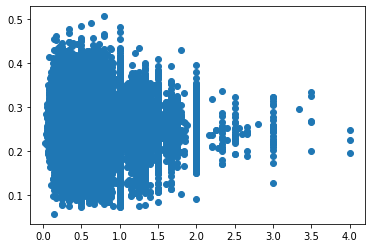

In [38]:
plt.scatter(pone['auth diversity'],Cos_dis)

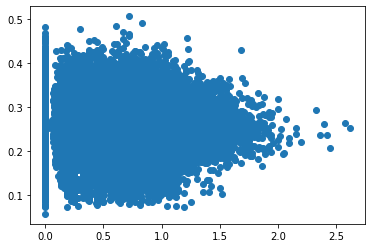

In [59]:
plt.scatter(pone['Gini Diversity'],Cos_dis)

In [48]:
pone[pone['Cos_dis'].apply(lambda x : True if x>0.3 else False)]['Affiliation index'][20]

[['aff001'],
 ['aff002', 'aff003', 'cor001'],
 ['aff004'],
 ['aff002'],
 ['aff004', 'aff005'],
 ['aff001'],
 ['aff004', 'aff006']]

# Save

In [33]:
for sub in sub_name:
    pone.loc[index_by_subject[sub]][['Year','Title','auth diversity','Cos_dis','Total author number','Filename']].to_csv('../../Data/Experiment/Plosone/pone_sBERT_authcos/'+sub+'.csv')

In [60]:
for sub in sub_name:
    pone.loc[index_by_subject[sub]][['Year','Title','Gini Diversity','Cos_dis','Total author number','Filename']].to_csv('../../Data/Experiment/Plosone/pone_sBERT_authcos_gini/'+sub+'.csv')
    
    
    
    
    
    
    
    

In [83]:
for sub in sub_name:
    pone.loc[index_by_subject[sub]][['Year','Title','Gini Diversity','Cos_dis_per_year','Total author number','Filename','Affiliation index cleaned']].to_csv('../../Data/Experiment/Plosone/pone_sBERT_authcos_year_gini/'+sub+'.csv')
    
    
    
    
    
    
    
    

In [145]:
for sub in sub_name:
    pone.loc[index_by_subject[sub]][['Year','Title','External number','Cos_dis_per_year','Total author number','Filename','Affiliation index cleaned']].to_csv('../../Data/Experiment/Plosone/pone_sBERT_ext_numb/'+sub+'.csv')


# Eliminate pones from one group

In [87]:
def get_one_group_bool(aff_list):
    aff_set = list(set([x for sublist in aff_list for x in sublist]))
    for aff in aff_set:
        one_group = True 
        for auth in aff_list:
            if aff not in auth:
                one_group = False
        if one_group ==True:
            return True
    return False
            

In [98]:
pone_wo_onegroup = pone[pone['Affiliation index cleaned'].apply(lambda x: not get_one_group_bool(x))]

In [99]:
for sub in sub_name:
    pone_wo_onegroup[pone_wo_onegroup['Discipline'].apply(lambda x: True if x[0] == sub else False)][['Year','Title','Gini Diversity','Cos_dis_per_year','Total author number','Filename','Affiliation index cleaned']].to_csv('../../Data/Experiment/Plosone/pone_sBERT_wo_1g_gini/'+sub+'.csv')
    
    
    
    


In [28]:
pone['Affiliation index'][6323]

[['aff001', 'aff002', 'aff003', 'cor001']]

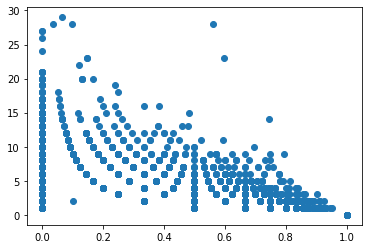

In [56]:
#plt.scatter([x for x in paper_temp_1_0['Ratio_ext_per_tot']],[x for x in paper_temp_1_0['Number_Int_author']],'r')
plt.scatter([x for x in paper_level_df['Ratio_ext_per_tot']],[x for x in paper_level_df['Number_Int_author']])

In [54]:
1

1

In [54]:
for inst in set(paper_level_df['Institute']):
    paper_level_df[(paper_level_df['Institute']==inst)].to_csv('../../Data/Experiment/~1920/paper_level_t_t_1_aug_21/'+inst+'.csv',index=False)
    #inst_paper_number.append(len(paper_level_df[(paper_level_df['Institute']==inst)]))

In [56]:
for inst in set(paper_level_df['Institute']):
    paper_level_df[(paper_level_df['Institute']==inst)].to_csv('../../Data/Experiment/~1920/paper_level_t_t/'+inst+'.csv',index=False)
    #inst_paper_number.append(len(paper_level_df[(paper_level_df['Institute']==inst)]))

In [72]:
report

,Title,Institute,Year,Responsibility,Responsibility affiliation,Internal Author,External Author,Vector,Total,Co-Responsibility
0,21세기 생물산업 창조를 향한 일본 정부의 기본전략과 프로젝트,과학기술정책연구원,2000,과학기술정책연구원,과학기술정책연구원,0,0,"[-0.13865119, 0.0730361, -0.06402836, 0.003185...","['지금', '경제', '구조', '변혁', '창조', '행동', '계획', '각료...",NaN
1,EU의 연구개발 정책동향,과학기술정책연구원,2000,정성철,과학기술정책연구원,0,0,"[0.47799772, -0.17755434, 0.10493075, 0.260855...","['미국', '일본', '세계', '과학', '기술', '발전', '주도', '국가...",NaN
2,PBS의 관련 개념과 적용조건,과학기술정책연구원,2000,과학기술정책연구원,과학기술정책연구원,0,0,"[-0.5031367, 0.016375901, -0.08534522, 0.35160...","['세계', '시장', '경쟁', '환경', '심화', '국가', '경쟁력', '노...",NaN
3,R D 평가시스템의 이론적 체계 구축 및 적용방안에 관한 연구,과학기술정책연구원,2000,이정원,과학기술정책연구원,0,0,"[0.39418456, -0.15357235, -0.16835006, -0.0165...","['개발', '활동', '개발', '평가', '자체', '효율', '결과', '효과...",NaN
4,개방형 모듈형 기술패러다임에 대응한 기술혁신전략 리눅스를 중심으로,과학기술정책연구원,2000,송위진,과학기술정책연구원,0,0,"[-0.538912, -0.16202988, -0.3912724, 0.1036049...","['인터넷', '발전', '리눅스', '확산', '기술', '개발', '환경', '...",NaN
...,...,...,...,...,...,...,...,...,...,...
23099,글로벌 프론티어 과학기술혁신정책 조사 및 국내적용 방안 탐색,과학기술정책연구원,2019,조용래,과학기술정책연구원,"[장진규, 정일영, 하태정]",0,"[-0.5031277, -0.23093802, -0.023912225, 0.2792...","['목', '차', '요약', '제', '서론', '절', '절', '주요', '내...",0
23100,한국 산업발전 비전 2030 제2권 산업편 제조업,산업연구원,2019,조영삼,산업연구원,"[김인철, 김주영, 박정수, 이준, 이용호, 조철, 산업비전연구팀]",0,"[0.14495634, -0.30336124, -0.3114997, 0.513969...","['우리나라', '주력', '제조업', '산업', '특징', '경쟁력', '원천',...",0
23101,미국의 보호무역주의 강화가 우리 산업에 미치는 영향,산업연구원,2019,김수동,산업연구원,"[강지현, 빙현지]","[설윤, 김종탁]","[-0.24329217, -0.08596091, 0.18411364, 0.33127...","['미국', '보호주의', '통상', '압박', '철강', '가전', '태양광', ...",0
23102,중소 지식서비스기업의 수출실태 분석 및 정책적 육성방안,산업연구원,2019,이영주,산업연구원,"[한창용, 김홍석]",0,"[0.03119674, -0.09743982, -0.22871974, -0.2393...","['산업', '혁명', '기술', '산업', '경쟁력', '제고', '서비스', '...",0


In [71]:
report.to_csv('../../Data/Experiment/~1920/REPORT.csv')

In [73]:
paper_level_df.to_csv('../../Data/Experiment/~1920/Total_count_author.csv',index=False)

### Cos_dis = Distance between total mean vector until time t-1 and paper vector at t

In [64]:
paper_level_df = pd.DataFrame(paper_level)
paper_level_df.head()

,Index,Title,Institute,Year,Cos_Dis,Number_Int_author,Ratio_ext_per_tot,Total_numb,Ext_total_numb,Abstract
0,979,e Business의 확산과 산업혁신과정의 변화 섬유산업,과학기술정책연구원,2001,0.562005,1,0.0,1,0,"['연구', '분석', '틀', '인터넷', '급속', '발전', '보급', '전자..."
1,980,e Business의 확산과 산업혁신과정의 변화 화학산업,과학기술정책연구원,2001,0.425771,1,0.0,1,0,"['책', '핵심', '연구', '주제', '비즈니스', '진화', '확산', '화..."
2,981,e Business의 확산과 산업혁신과정의 변화 보건의료산업,과학기술정책연구원,2001,0.474659,2,0.0,2,0,"['정보', '통신', '기술', '인터넷', '발전', '확산', '기업', '조..."
3,982,e Business의 확산과 산업혁신과정의 변화 전자산업,과학기술정책연구원,2001,0.560458,1,0.0,1,0,"['연구', '필요', '인터넷', '대표', '디지털', '기술', '활용', '..."
4,983,e Business의 확산과 산업혁신과정의 변화,과학기술정책연구원,2001,0.612539,4,0.0,4,0,"['비즈니스', '추진', '비즈니스', '우문', '세상', '정작', '비즈니스..."


In [65]:
#paper_temp_1_0 = paper_level_df[(paper_level_df['Number_Int_author']==1)&(paper_level_df['Ratio_ext_per_tot']!=1)]
paper_except_ncr = paper_level_df[(paper_level_df['Institute']!='경제인문사회연구회')]

In [66]:
paper_except_ncr[paper_except_ncr.notna()]

,Index,Title,Institute,Year,Cos_Dis,Number_Int_author,Ratio_ext_per_tot,Total_numb,Ext_total_numb,Abstract
0,979,e Business의 확산과 산업혁신과정의 변화 섬유산업,과학기술정책연구원,2001,0.562005,1,0.000000,1,0,"['연구', '분석', '틀', '인터넷', '급속', '발전', '보급', '전자..."
1,980,e Business의 확산과 산업혁신과정의 변화 화학산업,과학기술정책연구원,2001,0.425771,1,0.000000,1,0,"['책', '핵심', '연구', '주제', '비즈니스', '진화', '확산', '화..."
2,981,e Business의 확산과 산업혁신과정의 변화 보건의료산업,과학기술정책연구원,2001,0.474659,2,0.000000,2,0,"['정보', '통신', '기술', '인터넷', '발전', '확산', '기업', '조..."
3,982,e Business의 확산과 산업혁신과정의 변화 전자산업,과학기술정책연구원,2001,0.560458,1,0.000000,1,0,"['연구', '필요', '인터넷', '대표', '디지털', '기술', '활용', '..."
4,983,e Business의 확산과 산업혁신과정의 변화,과학기술정책연구원,2001,0.612539,4,0.000000,4,0,"['비즈니스', '추진', '비즈니스', '우문', '세상', '정작', '비즈니스..."
...,...,...,...,...,...,...,...,...,...,...
19648,21579,생태공학적 기법을 활용한 지역단위 생태계 보호지역 확대방안,한국환경정책평가연구원,2018,0.488064,5,0.000000,5,0,"['연구', '다양', '생태', '보전', '생물', '다양', '보전', '생태..."
19649,21580,가뭄지역 농촌용수 개발계획의 전략환경영향평가 개선방안 연구 지하수 지표수 복합이...,한국환경정책평가연구원,2018,0.485207,5,0.000000,5,0,"['연구', '가뭄', '지역', '농촌', '용수', '개발', '계획', '친환..."
19650,21581,원자력시설 해체 부지의 재사용을 위한 환경관리 전략 토양 및 지하수 분야를 중심으로,한국환경정책평가연구원,2018,0.545353,6,0.000000,6,0,"['호기', '영구', '정지', '해체', '국내', '원전', '예정', '원전..."
19651,21582,중소하천 물환경 개선을 위한 용배수로 관리 및 활용 방안,한국환경정책평가연구원,2018,0.412155,4,0.000000,4,0,"['하천', '관리', '재정', '대하천', '위주', '대하천', '본류', '..."


In [67]:
for inst in set(paper_except_ncr['Institute']):
    paper_level_df[(paper_level_df['Institute']==inst)].to_csv('../Data/Experiment/paper_level_t_t_1_total/'+inst+'.csv',index=False)

In [ ]:
for inst in set(paper_except_ncr['Institute']):
    paper_level_df[(paper_level_df['Institute']==inst)].to_csv('../Data/Experiment/paper_level_t_t_1_total/'+inst+'.csv',index=False)
    
    
    
    